In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 2.34 ms (started: 2021-09-08 09:11:57 +00:00)


DATA GATHERING AND UPLOAD

In [2]:
!pip install bing-image-downloader

time: 3.25 s (started: 2021-09-08 09:12:02 +00:00)


In [3]:
!mkdir images

time: 112 ms (started: 2021-09-08 09:12:11 +00:00)


In [4]:
from bing_image_downloader import downloader
downloader.download("roast chicken", limit=30, output_dir="images", adult_filter_off=True)

[%] Downloading Images to /content/images/roast chicken


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/originals/32/a6/06/32a60634ed0440b44f4f1da0ffe48f12.png
[%] File Downloaded !

[%] Downloading Image #2 from https://www.triedandtruerecipe.com/wp-content/uploads/2018/12/Roast-Chicken-with-Potatoes-and-Green-Beans-and-Crispy-Garlic_3.png
[%] File Downloaded !

[%] Downloading Image #3 from https://www.triedandtruerecipe.com/wp-content/uploads/2018/12/Roast-Chicken-with-Potatoes-and-Green-Beans-and-Crispy-Garlic_1.png
[%] File Downloaded !

[%] Downloading Image #4 from https://i.pinimg.com/originals/06/6c/04/066c04460324604f045da40188a2efde.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.rd.com/wp-content/uploads/2019/01/Glazed-Roast-Chicken_EXPS_CHBZ19_170805_E10_24_5b.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://yestoyolks.com/wp-content/uploads/2019/09/IMG_3058-copy.jpg
[%] File 

In [5]:
from bing_image_downloader import downloader
downloader.download("roast turkey", limit=30, output_dir="images", adult_filter_off=True)

[%] Downloading Images to /content/images/roast turkey


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://wildwildwhisk.com/wp-content/uploads/2020/11/Thanksgiving-Turkey-1.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.simplyrecipes.com/thmb/wN1JYxBeHEWiYDijVNSJwaVk_64=/4055x2703/filters:fill(auto,1)/__opt__aboutcom__coeus__resources__content_migration__simply_recipes__uploads__2020__11__Moms-Roast-Turkey-LEAD-5-b12b705ad8b84695ba865b34969786e8.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/originals/97/75/7d/97757d07918b84d28f8d05cee6c6a299.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.pinimg.com/originals/d4/93/ef/d493ef51c244046f8191988df1ed2d24.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.pinimg.com/originals/0d/69/35/0d6935fd2b5a1a8cc0b22197dedb94ee.png
[%] File Downloaded !

[%] Downloading Image #6 from https://butchershopinc.com/wp-conte

In [6]:
from bing_image_downloader import downloader
downloader.download("rugby leather ball", limit=30, output_dir="images", adult_filter_off=True)

[%] Downloading Images to /content/images/rugby leather ball


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://sportantiques.co.uk/pub/media/catalog/product/2/5/sportantiques-small-967051981234.jpg
[Error]Invalid image, not saving https://sportantiques.co.uk/pub/media/catalog/product/2/5/sportantiques-small-967051981234.jpg

[!] Issue getting: https://sportantiques.co.uk/pub/media/catalog/product/2/5/sportantiques-small-967051981234.jpg
[!] Error:: Invalid image, not saving https://sportantiques.co.uk/pub/media/catalog/product/2/5/sportantiques-small-967051981234.jpg

[%] Downloading Image #1 from http://www.roviasports.com/images/products/orignal/vintage_ball/vintage_rugby_ball/VINTAGE%20BALL%20(Black%20Leather)/vintage-ball-black-leathera.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.pinimg.com/736x/86/65/d1/8665d1e8f60c29b94d99af5af6fa362b--beyond-the-rack-rugby.jpg
[%] File Downloaded !

[%] Downloading Image #3 fr

DATA PREPROCESSING

In [7]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['roast chicken','roast turkey','rugby leather ball']

for category in CATEGORIES:
  img_num = CATEGORIES.index(category)  #Encoding label values
  path = os.path.join(DATADIR, category) #Path created to make use of the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_resize = resize(img_array,(150,150,3))
    flat_data.append(img_resize.flatten())
    images.append(img_resize)
    target.append(img_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

time: 1min 9s (started: 2021-09-08 09:13:58 +00:00)


In [8]:
#Spliting, Training and Testing of data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data, target, test_size= 0.3, random_state= 109)

time: 246 ms (started: 2021-09-08 09:15:11 +00:00)


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000], 'kernel':['linear']},
              {'C':[1,10,100,1000], 'gamma':[0.001,0.0001], 'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 2min 3s (started: 2021-09-08 09:15:15 +00:00)


In [10]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 1, 1, 2, 0, 0, 2, 1, 0, 1, 2, 2,
       1, 0, 2, 0, 2])

time: 197 ms (started: 2021-09-08 09:17:58 +00:00)


In [11]:
y_test

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

time: 6.16 ms (started: 2021-09-08 09:18:01 +00:00)


In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix

time: 1.05 ms (started: 2021-09-08 09:18:05 +00:00)


In [13]:
accuracy_score(y_pred,y_test)

0.5925925925925926

time: 12.9 ms (started: 2021-09-08 09:18:09 +00:00)


In [14]:
confusion_matrix(y_pred,y_test)

array([[6, 2, 2],
       [1, 5, 1],
       [1, 4, 5]])

time: 16.9 ms (started: 2021-09-08 09:18:17 +00:00)


In [15]:
#Save model using pickle library

import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 128 ms (started: 2021-09-08 09:18:23 +00:00)


In [16]:
model = pickle.load(open('img_model.p','rb'))

time: 71 ms (started: 2021-09-08 09:18:27 +00:00)


DATA TESTING

ENTER urlhttps://cdn.shopify.com/s/files/1/0788/5979/products/mvp-leather-balls-heritage-leather-rugby-ball-2_1024x.jpg?v=1561783613
(769, 1024, 3)
 PREDICTED OUTPUT: rugby leather ball


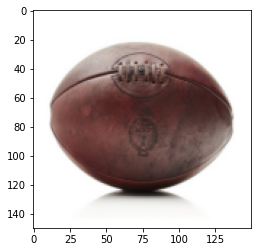

time: 4.27 s (started: 2021-09-07 10:08:50 +00:00)


In [ ]:
#Testing with new image

flat_data = []
url = input('ENTER url')
img = imread(url)
img_resize = resize(img,(150,150,3))
flat_data.append(img_resize.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resize)
y_output = model.predict(flat_data)
y_output = CATEGORIES[y_output[0]]
print(f' PREDICTED OUTPUT: {y_output}')

DEPLOYMENT


In [17]:
!pip install streamlit

!pip install pyngrok
from pyngrok import ngrok

     |████████████████████████████████| 8.0 MB 3.2 MB/s 
     |████████████████████████████████| 4.3 MB 26.2 MB/s 
     |████████████████████████████████| 111 kB 57.9 MB/s 
     |████████████████████████████████| 170 kB 52.9 MB/s 
     |████████████████████████████████| 75 kB 1.2 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 123 kB 67.2 MB/s 
     |████████████████████████████████| 787 kB 43.7 MB/s 
     |████████████████████████████████| 370 kB 66.7 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=e3139e45f2c0b0ba0e2a52351ea564485c7caa8b6a21d55323d17de56a852209
  Stored in directory: /root/.cache/pip/wheels/22/f5/18/df711b66eb25b21325c132757d4314db9ac5e8dabeaf196eab
Successfully built blinker
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting

     |████████████████████████████████| 745 kB 4.0 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19006 sha256=81f7569f250d904629b8a557cd1b0b1af95853396206ed69164a690b3c857a04
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok
time: 23.9 s (started: 2021-09-08 09:18:41 +00:00)


In [19]:
# Deployment of Model using streamlit
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
st.set_option('depreciation.showfileUploaderEncoder', False)
st.title('Image Classification Using Machine Learning')
st.txt('Upload Image')

upload_file = st.file_uploader("choose an image. . .", type="jpeg")
if uplaoded_file is not None:
  img = Image.open(uplaoded_file)
  st.image(img,caption='Uploaded Image')

  if st.button('PREDICT'):
    CATEGORIES = ['roast chicken','roast turkey','rugby leather ball']
    st.write('Result . . .')
    flat_data = []
    img = np.array(img)
    img_resize = resize(img,(150,150,3))
    flat_data.append(img_resize.flatten())
    flat_data = np.array(flat_data)
    y_output = model.predict(flat_data)
    y_output = CATEGORIES[y_output[0]]
    st.title(f' PREDICTED OUTPUT: {y_output}')
    q = model.predict_proba(flat_data)
    for index, item in enumerate(CATEGORIES):
      st.write(f'{item}: {q[0][index]*100}%')

Overwriting app.py
time: 7.7 ms (started: 2021-09-08 09:19:33 +00:00)


In [ ]:
!nohup streamlit run app.py &

url = ngrok.connect(port = '8501')
url

nohup: appending output to 'nohup.out'


<NgrokTunnel: "http://39be-35-186-177-227.ngrok.io" -> "http://localhost:80">

time: 337 ms (started: 2021-09-07 10:55:42 +00:00)
